<a href="https://colab.research.google.com/github/adrianavesa/logistic_regression_on_ads/blob/main/advertisment_classifiers_standard_scaler.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Classification models, and the effect of a standard scaler on the ROC curve, the AUC score and the R squared.**



## **Problem  Statement**


---




> We have aquired a data set containing 400 data points from kaggle ([Kaggle source for the data](https://www.kaggle.com/datasets/rakeshrau/social-network-ads).) The data set consists of columns containing the User ID, Gender, Age, and Estimated Income of the user, and a column indicating if the user purchased or not a product that was shown on its social media feed.


>  We would like to see if we can find a model that can be trained on this data set such that it will predict the purchase or not purchase of a product for future use. Also, we will explore if using a standard scaler on the data will impact the ROC, AUC and R squared.  

> Such a model could succesfully be used in the future as a step
 that would decide if a certain ad for a product should be shown on a user feed or not, minimizing the number of ads shown that have no result, and therefore minimizing advertising costs as each ad shown on a social media feed comes with a cost.

## **Executive Summary**






### **Importing the relevant libraries and uploading the dataset**

In [14]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.metrics import accuracy_score,precision_score,recall_score, f1_score, confusion_matrix,classification_report, precision_recall_curve

from sklearn.metrics import roc_curve, roc_auc_score, auc, ConfusionMatrixDisplay

from sklearn import svm
from sklearn.svm import SVC
import numpy as np


import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
advertisment_df = pd.read_csv("/content/drive/MyDrive/advertisments.csv")
advertisment_df.head()


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


### **Exploratory Data Analysis**

In [4]:
# "user ID" - does not matters for our prediction so we decide to frop the User ID column
advertisment_df = advertisment_df.drop(['User ID'], axis=1)
advertisment_df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [5]:
#gender column will be one hot encoded as it is a categorical feature.
# we create a new data frame of the feaures for or model - X, that has as features Gender (one hot encoded into 2 categories), Age and Estimated Salary.
# the target that we will train on will be the column "Purchased" - wich we store into the y.

X = pd.get_dummies(advertisment_df ['Gender']) \
        .join(advertisment_df ['Age']) \
        .join(advertisment_df ['EstimatedSalary'])

y = advertisment_df['Purchased']

In [6]:
# Splitting out data into a train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [7]:
X_train.head()

,Female,Male,Age,EstimatedSalary
177,0,1,25,22000
105,0,1,21,72000
5,0,1,27,58000
288,0,1,41,79000
279,1,0,50,36000


### **Classification using logistic regression**
##### **Logistic regression on the data set unscaled**

##### **Instatiating the logistic regression, fitting, getting the mean accuracy score**

In [8]:
lr = LogisticRegression(multi_class='ovr',solver='liblinear')
lr.fit(X_train, y_train)

accuracy = lr.score(X_test, y_test)
print ("Accuracy is {}".format(accuracy))

Accuracy is 0.7


In [9]:
predictions = lr.predict(X_test)

In [11]:
cm = confusion_matrix(y_test, predictions)

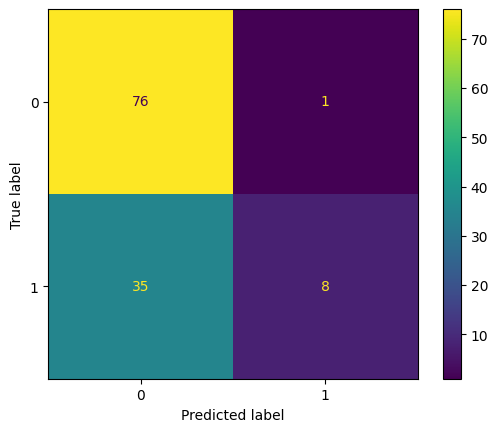

In [17]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr.classes_)
disp.plot()
plt.show()

As we can see above, this model has:
* **76 True Negatives** - which means the model predicted the product wont be purchased and it was not purchased,
* **35 False Negatives**  - which means the model predicted the product wont be purchased but it was purchased,
* **1 False Positive** - which means the model predicted the product will be purchased but it was not purchased,
* **8 True Positives** - which means the model predicted the product will be purchased and it was purchased.

This model would loose quite a lot of customers -- as it wont show the ad to those who are in the False negative category.

Let's look at other metrics available for this model:  




In [12]:
print("Evaluation metrics on unscaled data:")
print("Accuracy:", accuracy_score(y_test, predictions))
print("Precision:", precision_score(y_test, predictions))
print("Recall:", recall_score(y_test, predictions))
print("F1 score:", f1_score(y_test, predictions))

Evaluation metrics on unscaled data:
Accuracy: 0.7
Precision: 0.8888888888888888
Recall: 0.18604651162790697
F1 score: 0.3076923076923077


**Accuracy** is number of correct predictions is tthe fraction between TN and TP and the total. In our case, (76+8)/120 = 0.7

**Precision**  is defining the quality ofour  positive predictions -  the ability of the classifier not to label as positive a sample that is negative that is the fraction between the TP and (TP + FP) which in our case is 0.88.
 As we can see our precision is quite high - but that does not mean that the model is a good one as it is losing us quite a lot of potential customers, while not waisting money in showing the advertisment to people who won;t buy it (remember our False Positive count is just 1).

**Recall** shows us how well the model identifies true positives and it is calculated as the fraction between the true positives and the total of the positives we had in our sample : TP / (TP + FN) which in our case is 0.18. That is a very small value as this model has clearly a problem at identifying True Positives as our False Negatives count is very high.  

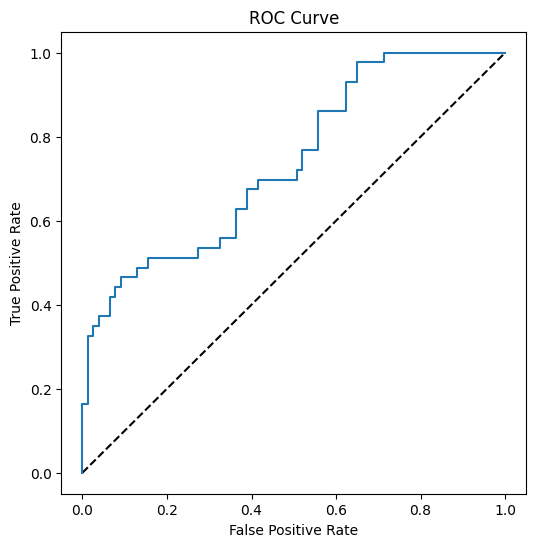

In [ ]:
y_scores = lr.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

fig = plt.figure(figsize=(6, 6))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [ ]:
#The area under the curve is
auc = roc_auc_score(y_test,y_scores[:,1])
print(f'The area under the curve is {auc}')

The area under the curve is 0.7375415282392026


##**STANDAR SCALER**

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [ ]:
# Fitting Logistic Regression to the Training set
lr_scaled = LogisticRegression(multi_class='ovr',solver='liblinear')
lr_scaled.fit(X_train_scaled, y_train)

LogisticRegression(multi_class='ovr', solver='liblinear')

In [ ]:
# Predicting the Test set results
predictions_scaled = lr_scaled.predict(X_test_scaled)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions_scaled)

array([[70,  7],
       [ 9, 34]])

In [ ]:

accuracy_scaled = lr_scaled.score(X_test_scaled, y_test)
print ("Accuracy is {}".format(accuracy_scaled))

Accuracy is 0.8666666666666667


In [ ]:
X_train_scaled

array([[-1.02166316,  1.02166316, -1.18758192, -1.41222212],
       [-1.02166316,  1.02166316, -1.56869704,  0.09151302],
       [-1.02166316,  1.02166316, -0.99702437, -0.32953282],
       ...,
       [-1.02166316,  1.02166316,  0.33687854, -0.50998103],
       [ 0.97879618, -0.97879618,  0.62271488,  2.10651812],
       [ 0.97879618, -0.97879618,  2.05189656, -1.2016992 ]])

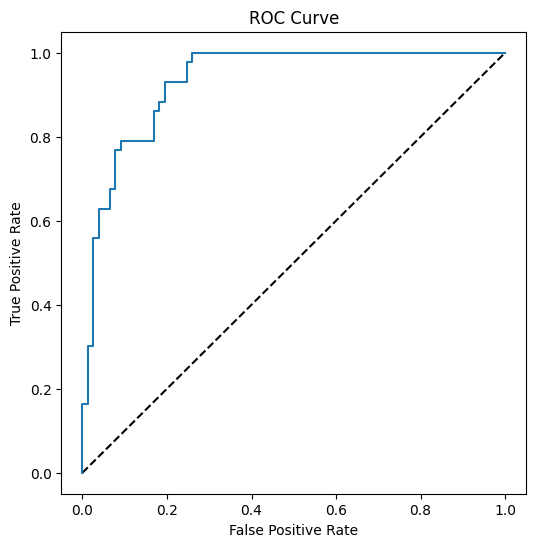

In [ ]:
y_scores_scaled = lr_scaled.predict_proba(X_test_scaled)

fpr, tpr, thresholds = roc_curve(y_test, y_scores_scaled[:,1])

fig = plt.figure(figsize=(6, 6))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [ ]:
y_scores_scaled


array([[0.39222169, 0.60777831],
       [0.54217352, 0.45782648],
       [0.67232573, 0.32767427],
       [0.98554609, 0.01445391],
       [0.7541607 , 0.2458393 ],
       [0.83458153, 0.16541847],
       [0.97392866, 0.02607134],
       [0.03351645, 0.96648355],
       [0.40826773, 0.59173227],
       [0.74618331, 0.25381669],
       [0.93554354, 0.06445646],
       [0.53332814, 0.46667186],
       [0.21577774, 0.78422226],
       [0.97974183, 0.02025817],
       [0.91030816, 0.08969184],
       [0.08729422, 0.91270578],
       [0.96204029, 0.03795971],
       [0.91594154, 0.08405846],
       [0.93187905, 0.06812095],
       [0.85059916, 0.14940084],
       [0.95353914, 0.04646086],
       [0.80636463, 0.19363537],
       [0.99443971, 0.00556029],
       [0.8625378 , 0.1374622 ],
       [0.91169991, 0.08830009],
       [0.57546552, 0.42453448],
       [0.98246108, 0.01753892],
       [0.01037318, 0.98962682],
       [0.76422101, 0.23577899],
       [0.4911851 , 0.5088149 ],
       [0.

In [ ]:
#The area under the curve is
auc = roc_auc_score(y_test,y_scores_scaled[:,1])
print(f'The area under the curve is {auc}')

The area under the curve is 0.933856840833585


In [ ]:
print("Evaluation metrics on a model trained on scaled data")
print("Accuracy:", accuracy_score(y_test, predictions_scaled))
print("Precision:", precision_score(y_test, predictions_scaled))
print("Recall:", recall_score(y_test, predictions_scaled))
print("F1 score:", f1_score(y_test, predictions_scaled))

Evaluation metrics on a model trained on scaled data
Accuracy: 0.8666666666666667
Precision: 0.8292682926829268
Recall: 0.7906976744186046
F1 score: 0.8095238095238095


### **Support Vector Machine Classification**

In [ ]:
classif = svm.SVC()
classif.fit(X_train_scaled, y_train)

SVC()

In [ ]:
# Predicting the Test set results
pred_y = classif.predict(X_test_scaled)



In [ ]:
# Making the Confusion Matrix
#from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred_y)

array([[68,  9],
       [ 4, 39]])

In [ ]:
accuracy_svc = classif.score(X_test_scaled, y_test)
print ("Accuracy is {}".format(accuracy_scaled))

Accuracy is 0.8666666666666667


In [ ]:
print("Evaluation metrics on a model trained on scaled data")
print("Accuracy:", accuracy_score(y_test, pred_y))
print("Precision:", precision_score(y_test, pred_y))
print("Recall:", recall_score(y_test, pred_y))
print("F1 score:", f1_score(y_test, pred_y))

Evaluation metrics on a model trained on scaled data
Accuracy: 0.8916666666666667
Precision: 0.8125
Recall: 0.9069767441860465
F1 score: 0.8571428571428572
